This notebook is almost a copy of the single-block notebook except analyzing different experiment results.
For more information, please refer to the single-block notebook.

Microbenchmark corresponds to
Figures 6(a,b) 7(a,b) 8(a,b) 9(a,b) 10(a,b) 16(a,b) 17(a,b) 18(a,b) in our paper.
This notebook reproduces the graphs correspond to Figures 8(a,b) 9(a,b)  10(a,b) 18(a,b).

In [1]:
# download and unzip dataset
!mkdir dataset_release
!wget --directory-prefix=dataset_release "https://github.com/taoluo/privacy-budget-scheduling/releases/download/microbench-data/multi_block.tar.gz"
!tar -xzf ./dataset_release/multi_block.tar.gz --directory ./dataset_release

In [2]:
import pandas as pd

from dpsched.analysis.data_collection import workspace2dataframe
from dpsched.analysis.plot import plot_granted_tasks, plot_delay_cdf
from dpsched.utils.configs import DpPolicyType
import matplotlib.pylab as plt
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
workspace_file = "workspace_06-25-04H-34-55" # remote multi
workspace_dir = "./dataset_release/%s" % workspace_file
table = workspace2dataframe(workspace_dir)
table.columns


/home/tao2/miniconda3/envs/pypy/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Following graph reproduces
 - fig 8(a) DPF behavior on multiple blocks. - Number of pipelines allocated.
 - fig 9(a) DPF and DPF-T behavior on multiple blocks. - Number of pipelines allocated.
 - fig 10(a) Traditional vs. Rényi DP, multiple blocks. - Number of pipelines allocated.
 - fig 18(a) Rényi DPF and DPF-T behaviors on multiple blocks. - Number of pipelines allocated.

Note that fig 9(a) 10(a) 18(a) aim to compare different policies.
Therefore, they group curves in ways different than what we present here.

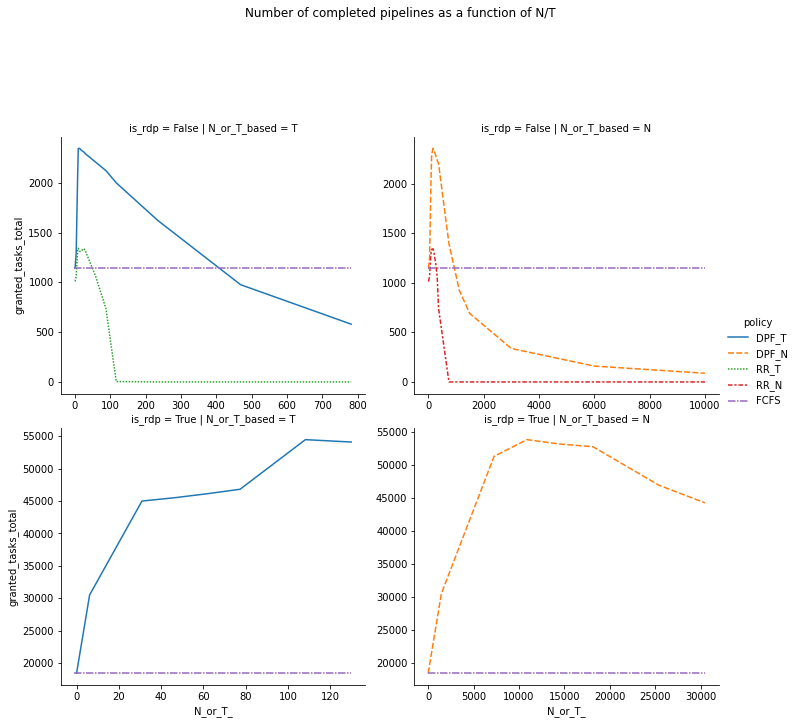

In [4]:
title = "Number of completed pipelines as a function of N/T"
table1 = table.loc[(table['epsilon_mice_fraction'] == 75)]

## extend FCFS data ponits into horizontal lines in different subplots.
fcfs_padding_list = []
fcfs_padding = table1[table1.policy == DpPolicyType.DP_POLICY_FCFS.value]
for N_or_T_based in ('N', 'T'):
    for is_rdp in (True, False):
        left = fcfs_padding[(fcfs_padding.is_rdp==is_rdp)].copy()
        left.N_or_T_ = -1
        left.N_or_T_based = N_or_T_based
        fcfs_padding_list.append(left)

        right = left.copy()
        max_N_or_T = max(table1[(table1.N_or_T_based == N_or_T_based) & (table1.is_rdp ==is_rdp) ].N_or_T_)
        right.N_or_T_ = max_N_or_T
        right.N_or_T_based = N_or_T_based
        # if not is_rdp:
        #     print(N_or_T_based)
        #     print(max_N_or_T)

        fcfs_padding_list.append(right)
table1_1 = pd.concat([table1] + fcfs_padding_list, axis=0)

plot_granted_tasks(save_file_name="figure1.pdf", table=table1_1, title=title, xaxis_col='N_or_T_',
                   yaxis_col='granted_tasks_total')


Following graph reproduces
 - fig 8(b) DPF behavior on multiple blocks. - Number of pipelines allocated.
 - fig 9(b) DPF and DPF-T behavior on multiple blocks. - Number of pipelines allocated.
 - fig 10(b) Traditional vs. Rényi DP, multiple blocks. - Number of pipelines allocated.
 - fig 18(b) Rényi DPF and DPF-T behaviors on multiple blocks. - Number of pipelines allocated.

Note that fig 9(b) 10(b) 18(b) aim to compare different policies.
Therefore, they group curves in ways different than what we present here.

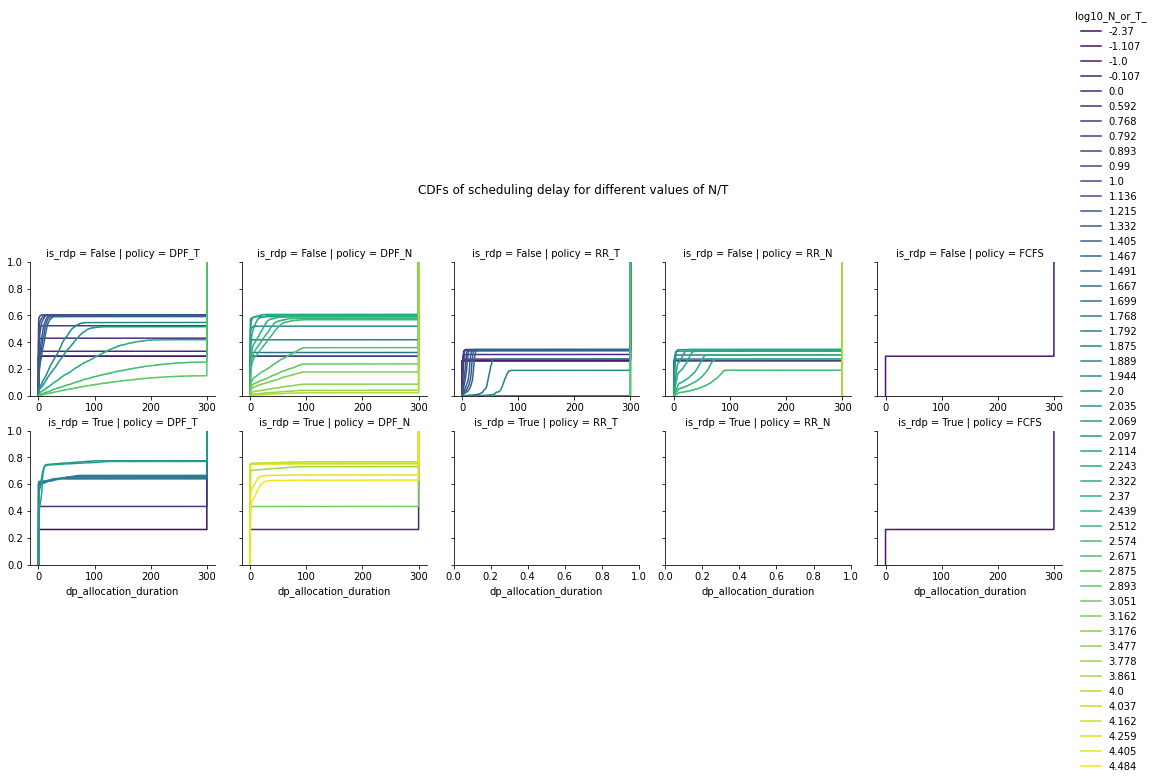

In [5]:

title = 'CDFs of scheduling delay for different values of N/T'
should_modify_alloc_duration = True  # immediate rejection's delay is treated as timeout
should_plot_granted = False
should_exclude_late_task = False  # exclude tasks arrived late
delay_lst_column = 'dp_allocation_duration_list'
plot_delay_cdf(table1, delay_lst_column, 'N_or_T_', 'figure2.pdf', should_exclude_late_task,
               should_modify_timeout_duration=True, task_timeout=300, plot_title=title)

Our paper doesn't contain following figures.
Basically, they are multiple-block version of fig 7(a) 17(a) in our paper.

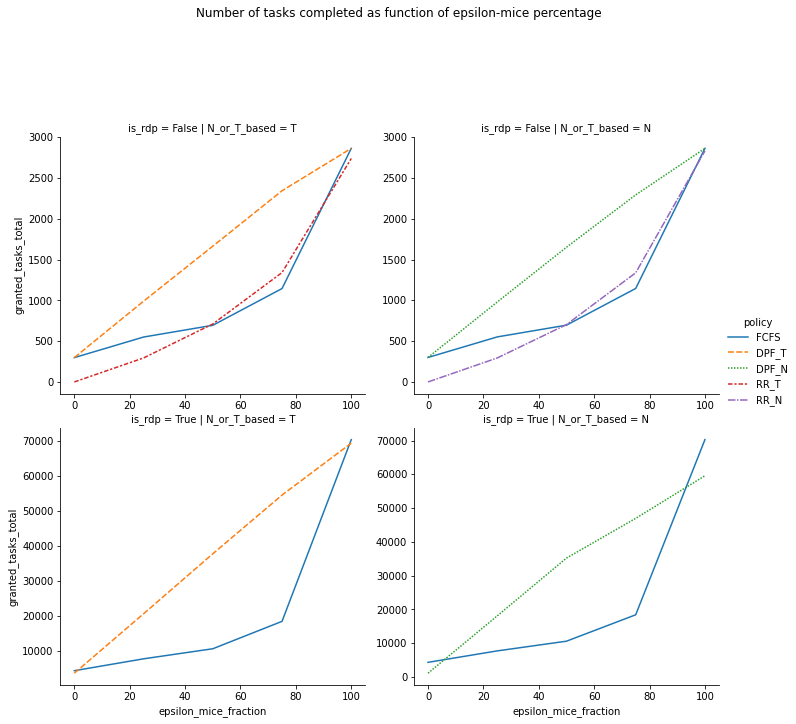

In [6]:
title = 'Number of tasks completed as function of epsilon-mice percentage '
# fix the N/T parameter for multiple block workload
fixed_N_or_T_dp = 125
fixed_N_or_T_rdp = 25399

is_fixed_n = lambda x: x in (-1, fixed_N_or_T_dp, fixed_N_or_T_rdp)
table2 = table.loc[table.N_.apply(is_fixed_n)]

fcfs_padding_list = []
fcfs_padding = table2[table2.policy == DpPolicyType.DP_POLICY_FCFS.value]
# left = fcfs_padding.copy()
# left.N_or_T_based = 'N'
for N_or_T_based in ('N', 'T'):
    pad_nt = fcfs_padding.copy()
    pad_nt.N_or_T_based = N_or_T_based
    fcfs_padding_list.append(pad_nt)



table2_1 = pd.concat([table2] + fcfs_padding_list, axis=0)

plot_granted_tasks(save_file_name="figure3.pdf", table=table2_1, title=title, xaxis_col='epsilon_mice_fraction',
                   yaxis_col='granted_tasks_total')

Our paper doesn't contain following figures.
Basically, they are multiple-block version of fig 7(b) 17(b) in our paper.

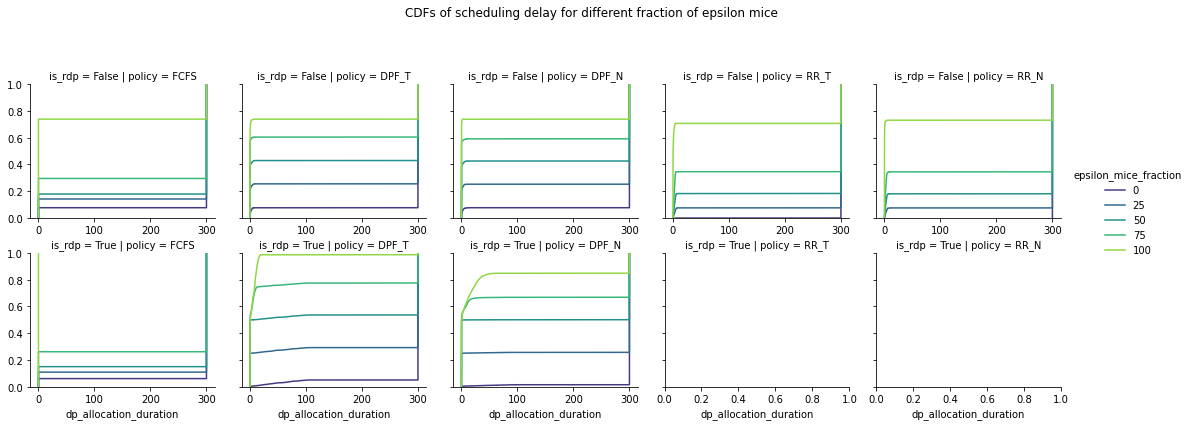

In [7]:
title = 'CDFs of scheduling delay for different fraction of epsilon mice'

plot_delay_cdf(table2, delay_lst_column, 'epsilon_mice_fraction', 'figure4.pdf', should_exclude_late_task,
               should_modify_timeout_duration=True, task_timeout=300, plot_title=title)

